In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- 봄: 2021년 3, 4, 5
- 여름: 2020년 6, 7, 8
- 가을: 2020년 9, 10, 11
- 겨울: 2020년 12, 2021년 1, 2

In [2]:
df_new1 = pd.read_csv('./data/공공자전거 대여이력_2020.12.csv', engine = 'python')
df_new2 = pd.read_csv('./data/공공자전거 대여이력_2021.01.csv', engine = 'python')
df_new3 = pd.read_csv('./data/공공자전거 대여이력_2021.02.csv', engine = 'python')

In [3]:
df_new = pd.merge(df_new1, df_new2, 
                  on = ['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', 
                        '반납일시', '반납대여소번호', '반납대여소명', '반납거치대', '이용시간', '이용거리'],how='outer')
df_new = pd.merge(df_new, df_new3, 
                  on = ['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', 
                        '반납일시', '반납대여소번호', '반납대여소명', '반납거치대', '이용시간', '이용거리'],how='outer')
df_new

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-33225,2020-12-01 00:00:05,671,대광빌딩,0,2020-12-01 00:01:45,672,대광고등학교,0,2,0.00
1,SPB-32037,2020-12-01 00:00:49,352,중앙고입구 삼거리,0,2020-12-01 00:02:33,353,재동초교 앞 삼거리,0,2,0.00
2,SPB-33654,2020-12-01 00:01:37,2644,성내5교 (GS주유소),0,2020-12-01 00:03:57,1277,오금동 송파 참병원,0,2,0.00
3,SPB-52806,2020-12-01 00:01:00,1953,천왕역 4번출구 뒤,0,2020-12-01 00:04:10,1952,천왕연지타운2단지 앞,0,3,0.00
4,SPB-80266,2020-12-01 00:00:53,1036,고덕동 주양쇼핑,99,2020-12-01 00:04:34,1036,고덕동 주양쇼핑,99,4,80.00
...,...,...,...,...,...,...,...,...,...,...,...
3218797,SPB-35567,2021-02-28 23:21:55,2910,도깨비시장,0,2021-02-28 23:59:48,1726,삼익세라믹아파트교차로,0,37,6403.05
3218798,SPB-52298,2021-02-28 23:32:22,1336,성북3교 위,0,2021-02-28 23:59:49,346,맥스타일 앞,0,27,3839.32
3218799,SPB-43850,2021-02-28 22:56:01,590,건국대학교 (입학정보관),0,2021-02-28 23:59:54,502,뚝섬유원지역 1번출구 앞,0,63,2021.30
3218800,SPB-31466,2021-02-28 23:09:27,283,아크로타워 스퀘어(영등포시장),0,2021-02-28 23:59:56,283,아크로타워 스퀘어(영등포시장),0,50,8361.71


In [4]:
df_new['대여대여소명'].unique()

array(['대광빌딩', '중앙고입구 삼거리', '성내5교 (GS주유소)', ..., '?移貶?4번출구',
       '몽촌토?봇?1번출구 옆', '옥수??3번출구'], dtype=object)

In [5]:
df = df_new[~df_new['대여대여소명'].str.contains('\?')]
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-33225,2020-12-01 00:00:05,671,대광빌딩,0,2020-12-01 00:01:45,672,대광고등학교,0,2,0.00
1,SPB-32037,2020-12-01 00:00:49,352,중앙고입구 삼거리,0,2020-12-01 00:02:33,353,재동초교 앞 삼거리,0,2,0.00
2,SPB-33654,2020-12-01 00:01:37,2644,성내5교 (GS주유소),0,2020-12-01 00:03:57,1277,오금동 송파 참병원,0,2,0.00
3,SPB-52806,2020-12-01 00:01:00,1953,천왕역 4번출구 뒤,0,2020-12-01 00:04:10,1952,천왕연지타운2단지 앞,0,3,0.00
4,SPB-80266,2020-12-01 00:00:53,1036,고덕동 주양쇼핑,99,2020-12-01 00:04:34,1036,고덕동 주양쇼핑,99,4,80.00
...,...,...,...,...,...,...,...,...,...,...,...
3218797,SPB-35567,2021-02-28 23:21:55,2910,도깨비시장,0,2021-02-28 23:59:48,1726,삼익세라믹아파트교차로,0,37,6403.05
3218798,SPB-52298,2021-02-28 23:32:22,1336,성북3교 위,0,2021-02-28 23:59:49,346,맥스타일 앞,0,27,3839.32
3218799,SPB-43850,2021-02-28 22:56:01,590,건국대학교 (입학정보관),0,2021-02-28 23:59:54,502,뚝섬유원지역 1번출구 앞,0,63,2021.30
3218800,SPB-31466,2021-02-28 23:09:27,283,아크로타워 스퀘어(영등포시장),0,2021-02-28 23:59:56,283,아크로타워 스퀘어(영등포시장),0,50,8361.71


In [6]:
df['대여대여소명'].unique()

array(['대광빌딩', '중앙고입구 삼거리', '성내5교 (GS주유소)', ..., '브라운스위트레지던스', '서소문역사공원',
       '서소문성지역사박물관'], dtype=object)

In [7]:
df['반납대여소명'].unique()

array(['대광고등학교', '재동초교 앞 삼거리', '오금동 송파 참병원', ..., '서소문성지역사박물관',
       '성?탓㈃育逃맙?3번출구 앞', '구룡초사거리 (현대아파트10??앞 )'], dtype=object)

In [8]:
df_new = df[~df['반납대여소명'].str.contains('\?')]
df_new

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-33225,2020-12-01 00:00:05,671,대광빌딩,0,2020-12-01 00:01:45,672,대광고등학교,0,2,0.00
1,SPB-32037,2020-12-01 00:00:49,352,중앙고입구 삼거리,0,2020-12-01 00:02:33,353,재동초교 앞 삼거리,0,2,0.00
2,SPB-33654,2020-12-01 00:01:37,2644,성내5교 (GS주유소),0,2020-12-01 00:03:57,1277,오금동 송파 참병원,0,2,0.00
3,SPB-52806,2020-12-01 00:01:00,1953,천왕역 4번출구 뒤,0,2020-12-01 00:04:10,1952,천왕연지타운2단지 앞,0,3,0.00
4,SPB-80266,2020-12-01 00:00:53,1036,고덕동 주양쇼핑,99,2020-12-01 00:04:34,1036,고덕동 주양쇼핑,99,4,80.00
...,...,...,...,...,...,...,...,...,...,...,...
3218797,SPB-35567,2021-02-28 23:21:55,2910,도깨비시장,0,2021-02-28 23:59:48,1726,삼익세라믹아파트교차로,0,37,6403.05
3218798,SPB-52298,2021-02-28 23:32:22,1336,성북3교 위,0,2021-02-28 23:59:49,346,맥스타일 앞,0,27,3839.32
3218799,SPB-43850,2021-02-28 22:56:01,590,건국대학교 (입학정보관),0,2021-02-28 23:59:54,502,뚝섬유원지역 1번출구 앞,0,63,2021.30
3218800,SPB-31466,2021-02-28 23:09:27,283,아크로타워 스퀘어(영등포시장),0,2021-02-28 23:59:56,283,아크로타워 스퀘어(영등포시장),0,50,8361.71


In [9]:
df_new['반납대여소명'].unique()

array(['대광고등학교', '재동초교 앞 삼거리', '오금동 송파 참병원', ..., '서소문역사공원', '브라운스위트레지던스',
       '서소문성지역사박물관'], dtype=object)

In [10]:
df_new = df_new.drop(['자전거번호', '대여거치대', '반납거치대', '이용거리'], axis = 1)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간
0,2020-12-01 00:00:05,671,대광빌딩,2020-12-01 00:01:45,672,대광고등학교,2
1,2020-12-01 00:00:49,352,중앙고입구 삼거리,2020-12-01 00:02:33,353,재동초교 앞 삼거리,2
2,2020-12-01 00:01:37,2644,성내5교 (GS주유소),2020-12-01 00:03:57,1277,오금동 송파 참병원,2
3,2020-12-01 00:01:00,1953,천왕역 4번출구 뒤,2020-12-01 00:04:10,1952,천왕연지타운2단지 앞,3
4,2020-12-01 00:00:53,1036,고덕동 주양쇼핑,2020-12-01 00:04:34,1036,고덕동 주양쇼핑,4


In [11]:
df_new['대여일시'] = pd.to_datetime(df_new['대여일시'])
df_new['반납일시'] = pd.to_datetime(df_new['반납일시'])

df_new['대여월'] = df_new['대여일시'].dt.month
df_new['대여일'] = df_new['대여일시'].dt.day
df_new['대여요일'] = df_new['대여일시'].dt.dayofweek
df_new['대여시간'] = df_new['대여일시'].dt.hour
df_new['대여시간_분'] = df_new['대여일시'].dt.minute

df_new['반납월'] = df_new['반납일시'].dt.month
df_new['반납일'] = df_new['반납일시'].dt.day
df_new['반납요일'] = df_new['반납일시'].dt.dayofweek
df_new['반납시간'] = df_new['반납일시'].dt.hour
df_new['반납시간_분'] = df_new['반납일시'].dt.minute

In [12]:
df_new = df_new.sort_values('대여일시', ignore_index = True)
df_new.head()

,대여일시,대여대여소번호,대여대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-12-01 00:00:02,1036,고덕동 주양쇼핑,2020-12-01 00:16:04,1058,고덕숲 아이파크 1,16,12,1,1,0,0,12,1,1,0,16
1,2020-12-01 00:00:05,671,대광빌딩,2020-12-01 00:01:45,672,대광고등학교,2,12,1,1,0,0,12,1,1,0,1
2,2020-12-01 00:00:14,1986,태평양물산빌딩,2020-12-01 00:08:23,1975,대림역 1번 출입구 밑,8,12,1,1,0,0,12,1,1,0,8
3,2020-12-01 00:00:17,1655,공릉1단지아파트,2020-12-01 00:54:45,1655,공릉1단지아파트,54,12,1,1,0,0,12,1,1,0,54
4,2020-12-01 00:00:19,287,영등포전화국사거리 (서강어린이공원),2020-12-01 00:10:44,266,영등포청과시장 사거리,10,12,1,1,0,0,12,1,1,0,10


In [13]:
df_new = df_new[df_new['대여월'] != 11]

In [14]:
df_rental = df_new[['대여일시', '대여대여소명','대여대여소번호', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental.head()

,대여일시,대여대여소명,대여대여소번호,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-12-01 00:00:02,고덕동 주양쇼핑,1036,12,1,1,0,0
1,2020-12-01 00:00:05,대광빌딩,671,12,1,1,0,0
2,2020-12-01 00:00:14,태평양물산빌딩,1986,12,1,1,0,0
3,2020-12-01 00:00:17,공릉1단지아파트,1655,12,1,1,0,0
4,2020-12-01 00:00:19,영등포전화국사거리 (서강어린이공원),287,12,1,1,0,0


In [15]:
df_rental2 = df_rental.groupby(['대여대여소명','대여대여소번호','대여시간']).size().reset_index().rename(columns = {0 : 'rent_count'})
df_rental2['rent_count'] = df_rental2['rent_count'] / 90     # 12월, 1월, 2월 합친 것이므로 나누기 90
df_rental2['mu_15'] = df_rental2['rent_count'] / 4
df_rental2

,대여대여소명,대여대여소번호,대여시간,rent_count,mu_15
0,(구)신한은행 중랑교지점,1442,0,0.744444,0.186111
1,(구)신한은행 중랑교지점,1442,1,0.455556,0.113889
2,(구)신한은행 중랑교지점,1442,2,0.388889,0.097222
3,(구)신한은행 중랑교지점,1442,3,0.177778,0.044444
4,(구)신한은행 중랑교지점,1442,4,0.244444,0.061111
...,...,...,...,...,...
52160,힐스테이트에코,2720,19,2.655556,0.663889
52161,힐스테이트에코,2720,20,2.300000,0.575000
52162,힐스테이트에코,2720,21,1.888889,0.472222
52163,힐스테이트에코,2720,22,1.188889,0.297222


In [16]:
df_return = df_new[['반납일시', '반납대여소명', '반납대여소번호','반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return.reset_index(drop = True, inplace = True)
df_return

,반납일시,반납대여소명,반납대여소번호,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-12-01 00:16:04,고덕숲 아이파크 1,1058,12,1,1,0,16
1,2020-12-01 00:01:45,대광고등학교,672,12,1,1,0,1
2,2020-12-01 00:08:23,대림역 1번 출입구 밑,1975,12,1,1,0,8
3,2020-12-01 00:54:45,공릉1단지아파트,1655,12,1,1,0,54
4,2020-12-01 00:10:44,영등포청과시장 사거리,266,12,1,1,0,10
...,...,...,...,...,...,...,...,...
3214854,2021-02-28 23:57:54,광화문역 5번출구,458,2,28,6,23,57
3214855,2021-02-28 23:59:46,사당역 12번출구 뒤,2222,2,28,6,23,59
3214856,2021-02-28 23:58:13,강변역 4번출구 뒤,542,2,28,6,23,58
3214857,2021-02-28 23:58:54,독립문역 사거리,348,2,28,6,23,58


In [17]:
df_c = df_return.groupby(['반납대여소명','반납대여소번호','반납시간']).size().reset_index().rename(columns = {0 : 'return_count'})
df_c['return_count'] = df_c['return_count'] / 90     # 12월, 1월, 2월 합친 것이므로 나누기 90
df_c['lambda15'] = df_c['return_count']/ 4
df_c = df_c.sort_values('lambda15', ascending = False).reset_index(drop = True)
df_c.columns = ['대여소명','대여소번호','시간','return_count','lambda15']
df_c

,대여소명,대여소번호,시간,return_count,lambda15
0,뚝섬유원지역 1번출구 앞,502,17,21.555556,5.388889
1,뚝섬유원지역 1번출구 앞,502,16,20.022222,5.005556
2,여의나루역 1번출구 앞,207,17,19.711111,4.927778
3,뚝섬유원지역 1번출구 앞,502,18,19.144444,4.786111
4,여의나루역 1번출구 앞,207,16,16.911111,4.227778
...,...,...,...,...,...
51480,신정이펜하우스 1단지아파트 입구 사거리,757,3,0.011111,0.002778
51481,남가좌동 제2공영주차장,3126,6,0.011111,0.002778
51482,신정이펜하우스 1단지아파트 입구 사거리,757,5,0.011111,0.002778
51483,신정이펜하우스 1단지아파트 입구 사거리,757,6,0.011111,0.002778


In [18]:
return_ubound = pd.DataFrame(df_c.groupby(['대여소명','대여소번호'])['return_count'].agg(lambda x : np.floor(np.percentile(x,75)+(np.percentile(x,75)-np.percentile(x,25))*1.5))).reset_index().rename(columns = {'return_count' : 'upperbound'})
return_ubound

,대여소명,대여소번호,upperbound
0,(구)신한은행 중랑교지점,1442,3.0
1,(구)합정동 주민센터,101,2.0
2,(시립)고덕평생학습관,1070,0.0
3,(재)FITI시험연구원,2724,2.0
4,3호선 매봉역 3번출구앞,2335,2.0
...,...,...,...
2254,흑석한강푸르지오(110동),2092,0.0
2255,흥국사 정류장,991,0.0
2256,희성오피앙,1639,2.0
2257,희훈타워빌 앞,3905,1.0


In [19]:
df_rental2.columns = ['대여소명','대여소번호','시간','rent_count','mu_15']
df = pd.merge(df_c, df_rental2, on=['대여소명','대여소번호','시간'], how='outer')
df.tail()

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15
53084,흑석한강푸르지오(110동),2092,7,NaN,NaN,0.600000,0.150000
53085,흑석한강푸르지오(110동),2092,10,NaN,NaN,0.300000,0.075000
53086,흑석한강푸르지오(110동),2092,11,NaN,NaN,0.177778,0.044444
53087,흥국사 정류장,991,2,NaN,NaN,0.055556,0.013889
53088,희훈타워빌 앞,3905,5,NaN,NaN,0.322222,0.080556


In [20]:
stops = df[['대여소명','대여소번호']].drop_duplicates().reset_index(drop=True)
Dayhour = pd.DataFrame({'시간':np.repeat(np.arange(24), len(stops))})
stops2 = pd.concat([stops] * 24).reset_index(drop=True)
Dayhour_frame = pd.concat([stops2,Dayhour],axis=1)

In [21]:
df = pd.merge(df,Dayhour_frame, on = ['대여소명','대여소번호','시간'],how='outer')
df = pd.merge(df, return_ubound, on=['대여소명','대여소번호'], how='outer')
df.fillna(0, inplace=True)
df.head(5)

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,뚝섬유원지역 1번출구 앞,502,17,21.555556,5.388889,14.533333,3.633333,22.0
1,뚝섬유원지역 1번출구 앞,502,16,20.022222,5.005556,16.033333,4.008333,22.0
2,뚝섬유원지역 1번출구 앞,502,18,19.144444,4.786111,15.088889,3.772222,22.0
3,뚝섬유원지역 1번출구 앞,502,15,14.855556,3.713889,13.122222,3.280556,22.0
4,뚝섬유원지역 1번출구 앞,502,19,11.777778,2.944444,10.544444,2.636111,22.0


In [22]:
df = df.sort_values(['대여소명', '대여소번호', '시간'], ignore_index = True)
df

,대여소명,대여소번호,시간,return_count,lambda15,rent_count,mu_15,upperbound
0,(구)신한은행 중랑교지점,1442,0,0.700000,0.175000,0.744444,0.186111,3.0
1,(구)신한은행 중랑교지점,1442,1,0.288889,0.072222,0.455556,0.113889,3.0
2,(구)신한은행 중랑교지점,1442,2,0.244444,0.061111,0.388889,0.097222,3.0
3,(구)신한은행 중랑교지점,1442,3,0.188889,0.047222,0.177778,0.044444,3.0
4,(구)신한은행 중랑교지점,1442,4,0.100000,0.025000,0.244444,0.061111,3.0
...,...,...,...,...,...,...,...,...
54211,힐스테이트에코,2720,19,2.277778,0.569444,2.655556,0.663889,4.0
54212,힐스테이트에코,2720,20,1.711111,0.427778,2.300000,0.575000,4.0
54213,힐스테이트에코,2720,21,1.433333,0.358333,1.888889,0.472222,4.0
54214,힐스테이트에코,2720,22,0.888889,0.222222,1.188889,0.297222,4.0


In [23]:
df = df.drop(['return_count', 'rent_count'], axis = 1)
df = df.rename(columns = {'lambda15' : 'lambda_15', 'upperbound' : 'c'})
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c
0,(구)신한은행 중랑교지점,1442,0,0.175000,0.186111,3.0
1,(구)신한은행 중랑교지점,1442,1,0.072222,0.113889,3.0
2,(구)신한은행 중랑교지점,1442,2,0.061111,0.097222,3.0
3,(구)신한은행 중랑교지점,1442,3,0.047222,0.044444,3.0
4,(구)신한은행 중랑교지점,1442,4,0.025000,0.061111,3.0
...,...,...,...,...,...,...
54211,힐스테이트에코,2720,19,0.569444,0.663889,4.0
54212,힐스테이트에코,2720,20,0.427778,0.575000,4.0
54213,힐스테이트에코,2720,21,0.358333,0.472222,4.0
54214,힐스테이트에코,2720,22,0.222222,0.297222,4.0


In [24]:
df['rho'] = float(-1)

for i in range(len(df)):
    if df['mu_15'][i] == 0:
        df['rho'][i] = 0
    else:
        df['rho'][i] = df['lambda_15'][i] / df['mu_15'][i]
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho
0,(구)신한은행 중랑교지점,1442,0,0.175000,0.186111,3.0,0.940299
1,(구)신한은행 중랑교지점,1442,1,0.072222,0.113889,3.0,0.634146
2,(구)신한은행 중랑교지점,1442,2,0.061111,0.097222,3.0,0.628571
3,(구)신한은행 중랑교지점,1442,3,0.047222,0.044444,3.0,1.062500
4,(구)신한은행 중랑교지점,1442,4,0.025000,0.061111,3.0,0.409091
...,...,...,...,...,...,...,...
54211,힐스테이트에코,2720,19,0.569444,0.663889,4.0,0.857741
54212,힐스테이트에코,2720,20,0.427778,0.575000,4.0,0.743961
54213,힐스테이트에코,2720,21,0.358333,0.472222,4.0,0.758824
54214,힐스테이트에코,2720,22,0.222222,0.297222,4.0,0.747664


In [25]:
# p_c: 대여소에 자전거가 c개(최대거치용량) 있을 확률

df['p_c'] = float(-1)

for i in range(len(df)):
    if df['rho'][i] == 1:
        df['p_c'][i] = 1 / (1 + df['c'][i]) 
    else:
        df['p_c'][i] = (df['rho'][i]**df['c'][i]) * ((1 - df['rho'][i]) / (1 - (df['rho'][i]**(df['c'][i] + 1))))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c
0,(구)신한은행 중랑교지점,1442,0,0.175000,0.186111,3.0,0.940299,0.227411
1,(구)신한은행 중랑교지점,1442,1,0.072222,0.113889,3.0,0.634146,0.111298
2,(구)신한은행 중랑교지점,1442,2,0.061111,0.097222,3.0,0.628571,0.109308
3,(구)신한은행 중랑교지점,1442,3,0.047222,0.044444,3.0,1.062500,0.273172
4,(구)신한은행 중랑교지점,1442,4,0.025000,0.061111,3.0,0.409091,0.041621
...,...,...,...,...,...,...,...,...
54211,힐스테이트에코,2720,19,0.569444,0.663889,4.0,0.857741,0.143736
54212,힐스테이트에코,2720,20,0.427778,0.575000,4.0,0.743961,0.101586
54213,힐스테이트에코,2720,21,0.358333,0.472222,4.0,0.758824,0.106847
54214,힐스테이트에코,2720,22,0.222222,0.297222,4.0,0.747664,0.102889


In [26]:
# L_s : 대여소 내 평균 자전거 수

df['L_s'] = float(-1)

for i in range(len(df)):
    rho = df['rho'][i]
    c = df['c'][i]
    if df['rho'][i] == 1:
        df['L_s'][i] = c / 2
    else:
        df['L_s'][i] = (rho / (1 - rho)) * ((1 - ((c + 1) * rho**c) + (c * rho**(c + 1))) / (1 - (rho**(c + 1))))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s
0,(구)신한은행 중랑교지점,1442,0,0.175000,0.186111,3.0,0.940299,0.227411,1.423135
1,(구)신한은행 중랑교지점,1442,1,0.072222,0.113889,3.0,0.634146,0.111298,0.961670
2,(구)신한은행 중랑교지점,1442,2,0.061111,0.097222,3.0,0.628571,0.109308,0.952378
3,(구)신한은행 중랑교지점,1442,3,0.047222,0.044444,3.0,1.062500,0.273172,1.575702
4,(구)신한은행 중랑교지점,1442,4,0.025000,0.061111,3.0,0.409091,0.041621,0.577048
...,...,...,...,...,...,...,...,...,...
54211,힐스테이트에코,2720,19,0.569444,0.663889,4.0,0.857741,0.143736,1.696181
54212,힐스테이트에코,2720,20,0.427778,0.575000,4.0,0.743961,0.101586,1.429782
54213,힐스테이트에코,2720,21,0.358333,0.472222,4.0,0.758824,0.106847,1.465457
54214,힐스테이트에코,2720,22,0.222222,0.297222,4.0,0.747664,0.102889,1.438688


In [27]:
# L_q : 대기행렬 내 평균 자전거 수

df['L_q'] = float(-1)

for i in range(len(df)):
    df['L_q'][i] = df['L_s'][i] - (df['rho'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q
0,(구)신한은행 중랑교지점,1442,0,0.175000,0.186111,3.0,0.940299,0.227411,1.423135,0.696670
1,(구)신한은행 중랑교지점,1442,1,0.072222,0.113889,3.0,0.634146,0.111298,0.961670,0.398103
2,(구)신한은행 중랑교지점,1442,2,0.061111,0.097222,3.0,0.628571,0.109308,0.952378,0.392514
3,(구)신한은행 중랑교지점,1442,3,0.047222,0.044444,3.0,1.062500,0.273172,1.575702,0.803447
4,(구)신한은행 중랑교지점,1442,4,0.025000,0.061111,3.0,0.409091,0.041621,0.577048,0.184984
...,...,...,...,...,...,...,...,...,...,...
54211,힐스테이트에코,2720,19,0.569444,0.663889,4.0,0.857741,0.143736,1.696181,0.961729
54212,힐스테이트에코,2720,20,0.427778,0.575000,4.0,0.743961,0.101586,1.429782,0.761397
54213,힐스테이트에코,2720,21,0.358333,0.472222,4.0,0.758824,0.106847,1.465457,0.787711
54214,힐스테이트에코,2720,22,0.222222,0.297222,4.0,0.747664,0.102889,1.438688,0.767951


In [28]:
# W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

df['W_s'] = float(-1)

for i in range(len(df)):
    if df['p_c'][i] == 0:
        df['W_s'][i] = 0
    elif df['p_c'][i] == 1:
        df['W_s'][i] = 0
    else:
        df['W_s'][i] = df['L_s'][i] / (df['lambda_15'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s
0,(구)신한은행 중랑교지점,1442,0,0.175000,0.186111,3.0,0.940299,0.227411,1.423135,0.696670,10.525902
1,(구)신한은행 중랑교지점,1442,1,0.072222,0.113889,3.0,0.634146,0.111298,0.961670,0.398103,14.983006
2,(구)신한은행 중랑교지점,1442,2,0.061111,0.097222,3.0,0.628571,0.109308,0.952378,0.392514,17.496917
3,(구)신한은행 중랑교지점,1442,3,0.047222,0.044444,3.0,1.062500,0.273172,1.575702,0.803447,45.908813
4,(구)신한은행 중랑교지점,1442,4,0.025000,0.061111,3.0,0.409091,0.041621,0.577048,0.184984,24.084356
...,...,...,...,...,...,...,...,...,...,...,...
54211,힐스테이트에코,2720,19,0.569444,0.663889,4.0,0.857741,0.143736,1.696181,0.961729,3.478672
54212,힐스테이트에코,2720,20,0.427778,0.575000,4.0,0.743961,0.101586,1.429782,0.761397,3.720277
54213,힐스테이트에코,2720,21,0.358333,0.472222,4.0,0.758824,0.106847,1.465457,0.787711,4.578887
54214,힐스테이트에코,2720,22,0.222222,0.297222,4.0,0.747664,0.102889,1.438688,0.767951,7.216602


In [29]:
# W_q : 대기행렬 내 평균대기시간

df['W_q'] = float(-1)

for i in range(len(df)):
    if df['p_c'][i] == 0:
        df['W_q'][i] = 0
    elif df['p_c'][i] == 1:
        df['W_s'][i] = 0
    else:
        df['W_q'][i] = df['L_q'][i] / (df['lambda_15'][i] * (1 - df['p_c'][i]))
df

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s,W_q
0,(구)신한은행 중랑교지점,1442,0,0.175000,0.186111,3.0,0.940299,0.227411,1.423135,0.696670,10.525902,5.152768
1,(구)신한은행 중랑교지점,1442,1,0.072222,0.113889,3.0,0.634146,0.111298,0.961670,0.398103,14.983006,6.202518
2,(구)신한은행 중랑교지점,1442,2,0.061111,0.097222,3.0,0.628571,0.109308,0.952378,0.392514,17.496917,7.211203
3,(구)신한은행 중랑교지점,1442,3,0.047222,0.044444,3.0,1.062500,0.273172,1.575702,0.803447,45.908813,23.408813
4,(구)신한은행 중랑교지점,1442,4,0.025000,0.061111,3.0,0.409091,0.041621,0.577048,0.184984,24.084356,7.720720
...,...,...,...,...,...,...,...,...,...,...,...,...
54211,힐스테이트에코,2720,19,0.569444,0.663889,4.0,0.857741,0.143736,1.696181,0.961729,3.478672,1.972395
54212,힐스테이트에코,2720,20,0.427778,0.575000,4.0,0.743961,0.101586,1.429782,0.761397,3.720277,1.981147
54213,힐스테이트에코,2720,21,0.358333,0.472222,4.0,0.758824,0.106847,1.465457,0.787711,4.578887,2.461240
54214,힐스테이트에코,2720,22,0.222222,0.297222,4.0,0.747664,0.102889,1.438688,0.767951,7.216602,3.852116


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54216 entries, 0 to 54215
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소명       54216 non-null  object 
 1   대여소번호      54216 non-null  int64  
 2   시간         54216 non-null  int64  
 3   lambda_15  54216 non-null  float64
 4   mu_15      54216 non-null  float64
 5   c          54216 non-null  float64
 6   rho        54216 non-null  float64
 7   p_c        54216 non-null  float64
 8   L_s        54216 non-null  float64
 9   L_q        54216 non-null  float64
 10  W_s        54216 non-null  float64
 11  W_q        54216 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 5.0+ MB


In [31]:
# 일부 칼럼 타입 카테고리로 변환

df = df.astype({'대여소명' : 'category', '대여소번호' : 'category'})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54216 entries, 0 to 54215
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   대여소명       54216 non-null  category
 1   대여소번호      54216 non-null  category
 2   시간         54216 non-null  int64   
 3   lambda_15  54216 non-null  float64 
 4   mu_15      54216 non-null  float64 
 5   c          54216 non-null  float64 
 6   rho        54216 non-null  float64 
 7   p_c        54216 non-null  float64 
 8   L_s        54216 non-null  float64 
 9   L_q        54216 non-null  float64 
 10  W_s        54216 non-null  float64 
 11  W_q        54216 non-null  float64 
dtypes: category(2), float64(9), int64(1)
memory usage: 4.5 MB


In [33]:
station = pd.read_csv('./대학원/데이터/정리 데이터/공공자전거 대여소 정보(21.06월 기준).csv')
station.head()

,대여소 번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD


In [34]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소 번호     2467 non-null   int64  
 1   보관소(대여소)명  2467 non-null   object 
 2   자치구        2467 non-null   object 
 3   상세주소       2467 non-null   object 
 4   위도         2467 non-null   float64
 5   경도         2467 non-null   float64
 6   설치 시기      2467 non-null   object 
 7   LCD 거치대수   1454 non-null   float64
 8   QR 거치대수    1014 non-null   float64
 9   운영 방식      2467 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 192.9+ KB


In [35]:
station = station.astype({'자치구' : 'category', '대여소 번호' : 'category'})

In [36]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   대여소 번호     2467 non-null   category
 1   보관소(대여소)명  2467 non-null   object  
 2   자치구        2467 non-null   category
 3   상세주소       2467 non-null   object  
 4   위도         2467 non-null   float64 
 5   경도         2467 non-null   float64 
 6   설치 시기      2467 non-null   object  
 7   LCD 거치대수   1454 non-null   float64 
 8   QR 거치대수    1014 non-null   float64 
 9   운영 방식      2467 non-null   object  
dtypes: category(2), float64(4), object(4)
memory usage: 261.6+ KB


In [37]:
station = station.rename(columns = {'대여소 번호' : '대여소번호'})
station

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치 시기,LCD 거치대수,QR 거치대수,운영 방식
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2015-09-06,20.0,NaN,LCD
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2015-09-06,14.0,NaN,LCD
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2015-09-06,13.0,NaN,LCD
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,5.0,NaN,LCD
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2015-09-06,10.0,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2462,4864,송파사거리,송파구,송파구 송파동 97-2,37.502056,127.110550,2021-04-27,NaN,6.0,QR
2463,4865,한성백제역 1번출구 뒤,송파구,송파구 방이동 45-4,37.516342,127.115593,2021-04-28,NaN,5.0,QR
2464,4867,가락대림아파트 앞,송파구,송파구 가락동 94-9,37.500027,127.118431,2021-04-28,NaN,10.0,QR
2465,4868,레이크 호텔 앞,송파구,송파구 석촌동 158,37.507172,127.101242,2021-05-18,NaN,7.0,QR


In [38]:
before_merged = len(df)

df = pd.merge(df, station[['자치구', '대여소번호']], on = '대여소번호')
df.head()

,대여소명,대여소번호,시간,lambda_15,mu_15,c,rho,p_c,L_s,L_q,W_s,W_q,자치구
0,(구)신한은행 중랑교지점,1442,0,0.175000,0.186111,3.0,0.940299,0.227411,1.423135,0.696670,10.525902,5.152768,중랑구
1,(구)신한은행 중랑교지점,1442,1,0.072222,0.113889,3.0,0.634146,0.111298,0.961670,0.398103,14.983006,6.202518,중랑구
2,(구)신한은행 중랑교지점,1442,2,0.061111,0.097222,3.0,0.628571,0.109308,0.952378,0.392514,17.496917,7.211203,중랑구
3,(구)신한은행 중랑교지점,1442,3,0.047222,0.044444,3.0,1.062500,0.273172,1.575702,0.803447,45.908813,23.408813,중랑구
4,(구)신한은행 중랑교지점,1442,4,0.025000,0.061111,3.0,0.409091,0.041621,0.577048,0.184984,24.084356,7.720720,중랑구


In [39]:
df = df.drop(['대여소번호', 'c'], axis = 1)
df = df[['자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'p_c', 'L_s', 'L_q', 'W_s', 'W_q']]
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.175000,0.186111,0.940299,0.227411,1.423135,0.696670,10.525902,5.152768
1,중랑구,(구)신한은행 중랑교지점,1,0.072222,0.113889,0.634146,0.111298,0.961670,0.398103,14.983006,6.202518
2,중랑구,(구)신한은행 중랑교지점,2,0.061111,0.097222,0.628571,0.109308,0.952378,0.392514,17.496917,7.211203
3,중랑구,(구)신한은행 중랑교지점,3,0.047222,0.044444,1.062500,0.273172,1.575702,0.803447,45.908813,23.408813
4,중랑구,(구)신한은행 중랑교지점,4,0.025000,0.061111,0.409091,0.041621,0.577048,0.184984,24.084356,7.720720


In [40]:
df.to_excel('./겨울 대여소별 Ls, Lq, Ws, Wq.xlsx', index = False)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [41]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.175000,0.186111,0.940299,1.423135,10.525902
1,중랑구,(구)신한은행 중랑교지점,1,0.072222,0.113889,0.634146,0.961670,14.983006
2,중랑구,(구)신한은행 중랑교지점,2,0.061111,0.097222,0.628571,0.952378,17.496917
3,중랑구,(구)신한은행 중랑교지점,3,0.047222,0.044444,1.062500,1.575702,45.908813
4,중랑구,(구)신한은행 중랑교지점,4,0.025000,0.061111,0.409091,0.577048,24.084356


In [42]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.091801,0.148077,0.123311,0.21016,0.184514,0.224396,0.1618,0.112807,0.222199,0.136012,0.179105,0.13767,0.212189,0.128682,0.112347,0.209945,0.160188,0.163932,0.232891,0.270675,0.103561,0.142408,0.144543,0.111103,0.149969


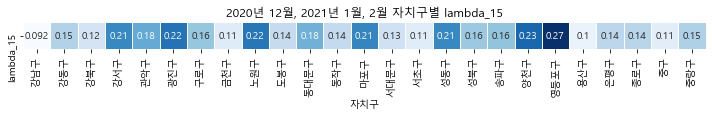

In [43]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [44]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.119334,0.191645,0.132884,0.281879,0.282071,0.345418,0.244251,0.178746,0.232162,0.150831,0.201547,0.175541,0.286101,0.153183,0.176767,0.314443,0.191935,0.225676,0.272968,0.367099,0.159583,0.211579,0.172223,0.147155,0.160511


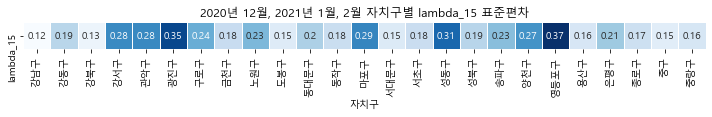

In [45]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [46]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.095251,0.146056,0.12447,0.209978,0.18906,0.221616,0.16142,0.113895,0.221817,0.136267,0.177297,0.136482,0.206162,0.137083,0.111913,0.206827,0.16262,0.162185,0.231339,0.26977,0.102118,0.141158,0.149457,0.115677,0.149502


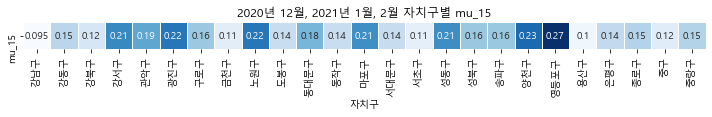

In [47]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [48]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.114093,0.179082,0.130068,0.268339,0.261692,0.294043,0.235195,0.164814,0.220141,0.139783,0.192484,0.151302,0.259893,0.141865,0.160961,0.285571,0.174183,0.220631,0.252951,0.343761,0.146006,0.185957,0.168317,0.142723,0.145397


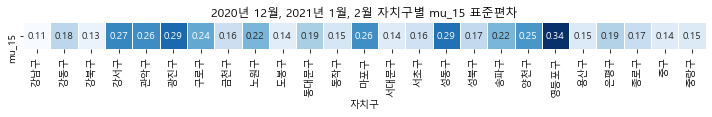

In [49]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [50]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.179417,1.272987,1.395573,1.324851,1.122774,1.279318,1.39553,1.65058,1.323972,1.320774,1.36423,1.276681,1.521818,1.166531,1.184528,1.372226,1.241427,1.265562,1.313924,1.435296,1.188414,1.192659,1.317634,1.245097,1.152874


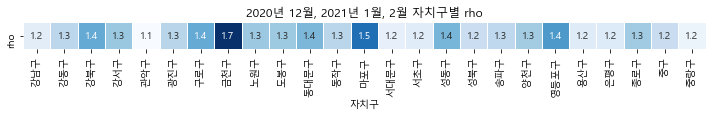

In [51]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 자치구별 rho')
plt.tight_layout()
plt.show()

In [52]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.340349,0.668294,0.473294,1.05696,0.862648,1.196127,0.732554,0.417598,1.173377,0.635338,0.856849,0.60332,1.148089,0.542988,0.50028,1.091622,0.789436,0.823967,1.31326,1.457686,0.495322,0.687202,0.716722,0.453437,0.693833


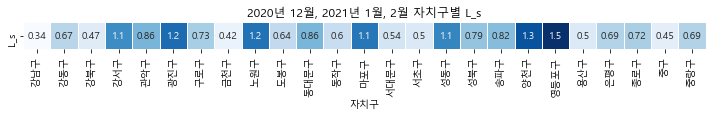

In [53]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [54]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.515741,0.918214,0.639491,1.309805,1.414237,2.137421,1.130572,0.612549,1.134661,0.758051,0.913198,0.833939,1.517229,0.669429,0.899441,1.576658,0.968503,1.225327,1.428523,1.867745,0.862304,1.17049,0.796679,0.611683,0.714682


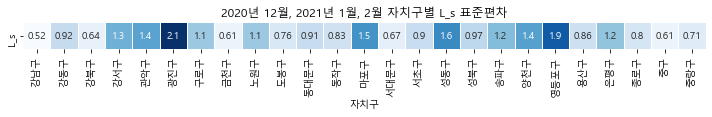

In [55]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [56]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,15.731498,17.116713,10.99163,25.745376,13.16652,20.099294,22.985964,17.741624,24.232022,22.320329,21.277637,14.713018,32.03616,17.69964,19.359659,27.656365,17.922373,22.920755,34.697429,34.686225,18.317641,14.74209,33.740044,16.545635,16.92368


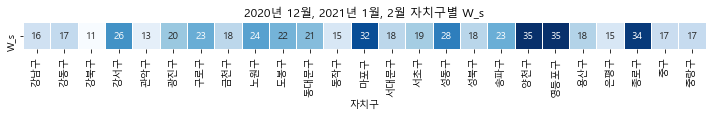

In [57]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [58]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,53.14693,50.833483,30.372878,78.745229,32.405084,64.158843,91.60534,45.326825,63.922915,66.067455,55.545626,45.025079,107.962814,48.1703,72.008516,109.429637,54.341169,87.371015,115.717786,98.777072,72.727717,48.704984,109.086407,54.320812,42.77492


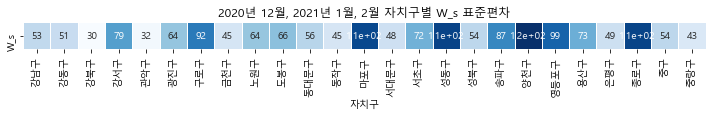

In [59]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [60]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2222,흑석한강푸르지오(110동)
2223,흥국사 정류장
2224,희성오피앙
2225,희훈타워빌 앞


In [61]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [62]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
984,강서구,KC 대학교,0,0.041667,0.008333,5.000000,0.000000,0.000000,학교
985,강서구,KC 대학교,1,0.066667,0.011111,6.000000,0.000000,0.000000,학교
986,강서구,KC 대학교,2,0.013889,0.005556,2.500000,0.000000,0.000000,학교
987,강서구,KC 대학교,3,0.011111,0.036111,0.307692,0.000000,0.000000,학교
988,강서구,KC 대학교,4,0.030556,0.000000,0.000000,0.000000,0.000000,학교
...,...,...,...,...,...,...,...,...,...
53251,동대문구,휘봉고등학교 앞,19,0.158333,0.133333,1.187500,0.542857,7.500000,학교
53252,동대문구,휘봉고등학교 앞,20,0.119444,0.083333,1.433333,0.589041,12.000000,학교
53253,동대문구,휘봉고등학교 앞,21,0.166667,0.058333,2.857143,0.740741,17.142857,학교
53254,동대문구,휘봉고등학교 앞,22,0.116667,0.052778,2.210526,0.688525,18.947368,학교


In [63]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
72,강남구,3호선 매봉역 3번출구앞,0,0.025000,0.038889,0.642857,0.714640,35.776398,지하철
73,강남구,3호선 매봉역 3번출구앞,1,0.027778,0.072222,0.384615,0.444015,17.692308,지하철
74,강남구,3호선 매봉역 3번출구앞,2,0.025000,0.052778,0.473684,0.543230,25.037594,지하철
75,강남구,3호선 매봉역 3번출구앞,3,0.044444,0.011111,4.000000,1.714286,162.000000,지하철
76,강남구,3호선 매봉역 3번출구앞,4,0.013889,0.008333,1.666667,1.326531,195.000000,지하철
...,...,...,...,...,...,...,...,...,...
53347,동작구,흑석역 4번출구,19,0.130556,0.183333,0.712121,0.000000,0.000000,지하철
53348,동작구,흑석역 4번출구,20,0.080556,0.108333,0.743590,0.000000,0.000000,지하철
53349,동작구,흑석역 4번출구,21,0.066667,0.080556,0.827586,0.000000,0.000000,지하철
53350,동작구,흑석역 4번출구,22,0.083333,0.058333,1.428571,0.000000,0.000000,지하철


In [64]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
456,서대문구,DMC센트럴아이파크아파트,0,0.058333,0.061111,0.954545,0.968998,24.355180,아파트
457,서대문구,DMC센트럴아이파크아파트,1,0.052778,0.069444,0.760000,0.819302,20.618182,아파트
458,서대문구,DMC센트럴아이파크아파트,2,0.033333,0.030556,1.090909,1.057935,49.802372,아파트
459,서대문구,DMC센트럴아이파크아파트,3,0.022222,0.027778,0.800000,0.852459,52.000000,아파트
460,서대문구,DMC센트럴아이파크아파트,4,0.016667,0.008333,2.000000,1.428571,200.000000,아파트
...,...,...,...,...,...,...,...,...,...
53179,동대문구,휘경sk뷰아파트 앞,19,0.136111,0.075000,1.814815,0.000000,0.000000,아파트
53180,동대문구,휘경sk뷰아파트 앞,20,0.163889,0.061111,2.681818,0.000000,0.000000,아파트
53181,동대문구,휘경sk뷰아파트 앞,21,0.052778,0.075000,0.703704,0.000000,0.000000,아파트
53182,동대문구,휘경sk뷰아파트 앞,22,0.061111,0.022222,2.750000,0.000000,0.000000,아파트


In [65]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2760,마포구,가온문화공원,0,0.025000,0.025000,1.000000,0.500000,40.000000,공원
2761,마포구,가온문화공원,1,0.016667,0.027778,0.600000,0.375000,36.000000,공원
2762,마포구,가온문화공원,2,0.019444,0.022222,0.875000,0.466667,45.000000,공원
2763,마포구,가온문화공원,3,0.008333,0.002778,3.000000,0.750000,360.000000,공원
2764,마포구,가온문화공원,4,0.008333,0.008333,1.000000,0.500000,120.000000,공원
...,...,...,...,...,...,...,...,...,...
53083,중구,훈련원공원주차장 앞,19,0.166667,0.305556,0.545455,0.618834,4.427807,공원
53084,중구,훈련원공원주차장 앞,20,0.202778,0.180556,1.123077,1.077208,8.468227,공원
53085,중구,훈련원공원주차장 앞,21,0.252778,0.166667,1.516667,1.269938,9.615894,공원
53086,중구,훈련원공원주차장 앞,22,0.127778,0.150000,0.851852,0.893560,9.733333,공원


In [66]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.041667,0.008333,5.000000,0.000000,0.000000,학교
1,강서구,KC 대학교,1,0.066667,0.011111,6.000000,0.000000,0.000000,학교
2,강서구,KC 대학교,2,0.013889,0.005556,2.500000,0.000000,0.000000,학교
3,강서구,KC 대학교,3,0.011111,0.036111,0.307692,0.000000,0.000000,학교
4,강서구,KC 대학교,4,0.030556,0.000000,0.000000,0.000000,0.000000,학교
...,...,...,...,...,...,...,...,...,...
21235,중구,훈련원공원주차장 앞,19,0.166667,0.305556,0.545455,0.618834,4.427807,공원
21236,중구,훈련원공원주차장 앞,20,0.202778,0.180556,1.123077,1.077208,8.468227,공원
21237,중구,훈련원공원주차장 앞,21,0.252778,0.166667,1.516667,1.269938,9.615894,공원
21238,중구,훈련원공원주차장 앞,22,0.127778,0.150000,0.851852,0.893560,9.733333,공원


In [67]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.062439  0.045206  0.033014  0.018191  0.015634  0.018904  0.042011   
아파트  0.070867  0.049133  0.029322  0.019973  0.013645  0.013144  0.017331   
지하철  0.092786  0.070972  0.051178  0.034755  0.026810  0.044056  0.085723   
학교   0.055785  0.040709  0.027471  0.020287  0.013966  0.010900  0.017835   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.077507  0.184095  0.115905  0.095354  0.120157  0.161726  0.192134   
아파트  0.051220  0.119404  0.080949  0.076247  0.101978  0.140041  0.159648   
지하철  0.183518  0.329779  0.219708  0.178818  0.221702  0.279529  0.316035   
학교   0.045728  0.122663  0.095460  0.078985  0.089387  0.132184  0.142069   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.215290  0.265683  0.296853  0.331244  0.370723  0.266888  0.201352   
아파트  0.170542  0.202615  0.237696  0.284593  0.359051  0.269688  0.204932   
지하철  0.348624  0.393220  0.451323  0.537770  0.599849  0.388764  0.286065   
학교   0.151533  0.178908  0.211092  0.231226  0.283008  0.203027  0.160307   

                                   
시간         21        22        23  
특성                                 
공원   0.224164  0.144617  0.091003  
아파트  0.228645  0.155420  0.094919  
지하철  0.279845  0.197946  0.124664  
학교   0.169751  0.123467  0.083640

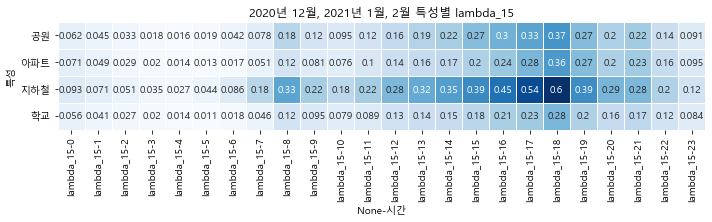

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.063596  0.050683  0.043964  0.020926  0.025094  0.038217  0.060898   
아파트  0.064790  0.046368  0.030973  0.025884  0.018549  0.021843  0.030680   
지하철  0.085894  0.067682  0.048499  0.035962  0.030782  0.063038  0.112328   
학교   0.055699  0.047160  0.037918  0.033430  0.019977  0.019365  0.034810   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.159609  0.277751  0.157937  0.099213  0.111215  0.144317  0.180321   
아파트  0.100917  0.246541  0.096040  0.077791  0.090555  0.118981  0.143082   
지하철  0.237182  0.381456  0.213138  0.152609  0.182151  0.228270  0.262190   
학교   0.058294  0.169099  0.115975  0.090621  0.082434  0.116916  0.126405   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.223207  0.287118  0.313649  0.305957  0.326741  0.234049  0.182231   
아파트  0.155881  0.191205  0.227409  0.246038  0.288344  0.214386  0.160525   
지하철  0.309121  0.377362  0.467585  0.538060  0.536306  0.329982  0.258572   
학교   0.147345  0.194220  0.232044  0.247858  0.272759  0.188134  0.145910   

                                   
시간         21        22        23  
특성                                 
공원   0.216594  0.142614  0.085438  
아파트  0.196082  0.129602  0.078098  
지하철  0.262445  0.198148  0.129936  
학교   0.147541  0.128334  0.085556

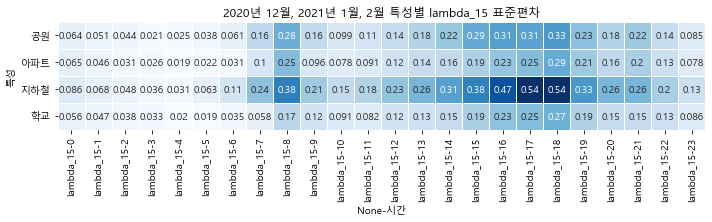

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.051672  0.038176  0.022788  0.016150  0.016028  0.033800  0.049115   
아파트  0.050447  0.037005  0.025352  0.019119  0.017263  0.033672  0.063266   
지하철  0.091732  0.064870  0.048098  0.034623  0.025895  0.025553  0.050402   
학교   0.042299  0.030211  0.019272  0.013927  0.013008  0.023831  0.048142   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.138348  0.222837  0.138864  0.119912  0.159538  0.204130  0.221706   
아파트  0.164797  0.256640  0.141721  0.127425  0.148415  0.176951  0.195718   
지하철  0.146426  0.340699  0.213119  0.174480  0.226514  0.281293  0.319609   
학교   0.118774  0.195575  0.116973  0.105077  0.125230  0.157548  0.168046   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.260816  0.283850  0.296313  0.308038  0.311087  0.207522  0.175615   
아파트  0.215068  0.224499  0.239201  0.245989  0.251355  0.171057  0.158089   
지하철  0.363033  0.404950  0.428192  0.480819  0.568148  0.397321  0.321459   
학교   0.187644  0.205709  0.218487  0.230249  0.204981  0.141762  0.121667   

                                   
시간         21        22        23  
특성                                 
공원   0.166765  0.109562  0.072173  
아파트  0.152371  0.097791  0.060000  
지하철  0.312098  0.191390  0.118628  
학교   0.121648  0.084655  0.053238

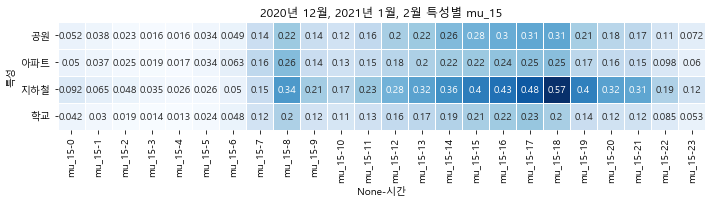

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [73]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.054332  0.048125  0.023652  0.019482  0.033624  0.047854  0.068496   
아파트  0.044742  0.032395  0.026670  0.025320  0.026453  0.047151  0.073522   
지하철  0.076195  0.059042  0.049428  0.043422  0.031819  0.034003  0.057053   
학교   0.035523  0.031605  0.018609  0.017720  0.025944  0.041246  0.065714   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.137755  0.235235  0.133814  0.102579  0.120594  0.166233  0.186614   
아파트  0.161811  0.235845  0.115230  0.093891  0.114382  0.126163  0.139283   
지하철  0.173765  0.370171  0.183730  0.128101  0.166354  0.209701  0.255014   
학교   0.127563  0.211852  0.108603  0.087076  0.095379  0.111824  0.128578   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.247750  0.285639  0.275015  0.284675  0.297851  0.188271  0.160854   
아파트  0.159720  0.184706  0.198622  0.218106  0.249542  0.136545  0.133441   
지하철  0.320223  0.373260  0.406932  0.426425  0.499704  0.353087  0.285300   
학교   0.146700  0.193625  0.193812  0.209828  0.194896  0.127142  0.120225   

                                   
시간         21        22        23  
특성                                 
공원   0.143531  0.092294  0.066623  
아파트  0.130018  0.082037  0.048452  
지하철  0.263764  0.169923  0.107314  
학교   0.125172  0.075101  0.045912

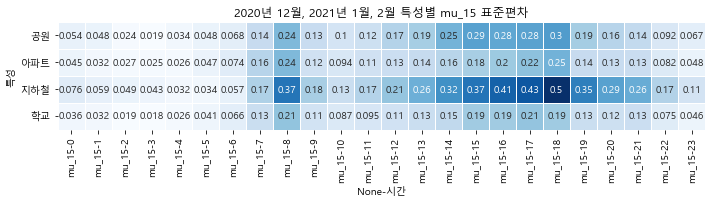

In [74]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [75]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.493182  1.629341  1.581375  1.264104  1.651590  1.752994  2.520743   
아파트  1.821345  1.573860  1.692656  1.433886  1.197027  0.950297  0.541161   
지하철  1.075471  1.249912  1.398215  1.425653  1.614935  2.560274  2.881020   
학교   1.567496  1.609438  1.529785  1.618624  1.755550  1.067746  1.309459   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.140616  1.539380  1.233905  0.918817  0.814744  0.799776  0.811615   
아파트  0.473087  0.553201  0.605299  0.574912  0.684912  0.742796  0.751658   
지하철  2.002436  1.309425  1.234419  1.077079  0.991208  0.984350  0.991992   
학교   1.095762  1.902890  2.023192  1.005328  0.771880  0.824851  0.872574   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.821379  0.915580  0.962723  1.072810  1.369153  1.376584  1.279098   
아파트  0.741412  0.824164  0.936885  1.168586  1.626848  1.675450  1.444482   
지하철  0.954908  0.959424  1.022289  1.119412  1.127488  1.064471  0.978165   
학교   0.802018  0.845518  0.928922  1.025608  1.495101  1.586703  1.653839   

                                   
시간         21        22        23  
특성                                 
공원   1.431368  1.513666  1.484808  
아파트  1.666095  1.832458  1.741406  
지하철  0.998640  1.126705  1.169762  
학교   1.805408  1.649128  1.913400

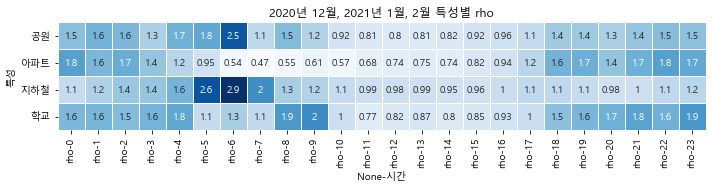

In [76]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 특성별 rho')
plt.tight_layout()
plt.show()

In [77]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.845469  0.867127  0.878620  0.762077  0.714372  0.439934  0.711479   
아파트  0.774870  0.774797  0.707245  0.675922  0.586741  0.329629  0.287664   
지하철  1.158240  1.342150  1.272278  1.270723  1.244188  1.567015  1.579793   
학교   0.560674  0.561521  0.565224  0.560371  0.455147  0.262074  0.261088   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.522579  0.683261  0.645081  0.635446  0.602490  0.609520  0.688041   
아파트  0.278117  0.348840  0.416166  0.434110  0.475840  0.526087  0.566464   
지하철  1.428423  1.264828  1.308299  1.301395  1.249151  1.258008  1.227454   
학교   0.278543  0.379071  0.382279  0.385493  0.379901  0.454613  0.443180   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.643098  0.741071  0.774002  0.806779  0.859732  0.854953  0.784222   
아파트  0.545451  0.591710  0.632750  0.690960  0.764545  0.810854  0.731634   
지하철  1.195144  1.211924  1.333214  1.382885  1.308714  1.188996  1.087606   
학교   0.435327  0.450822  0.494245  0.504044  0.601422  0.599692  0.564795   

                                   
시간         21        22        23  
특성                                 
공원   0.879508  0.868679  0.846407  
아파트  0.793808  0.813015  0.826110  
지하철  1.068922  1.209501  1.222188  
학교   0.561515  0.609088  0.631461

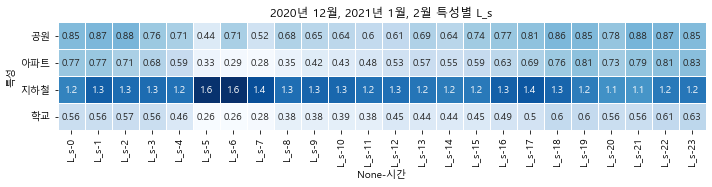

In [78]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 특성별 L_s')
plt.tight_layout()
plt.show()

In [79]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.128687  1.129826  1.192961  1.173000  1.177315  1.035560  1.278415   
아파트  0.965289  0.984242  0.898643  0.922433  0.934615  0.532250  0.559353   
지하철  1.489805  1.759648  1.709799  1.831537  1.824713  2.385165  2.052741   
학교   0.779615  0.792995  0.828589  0.925778  0.893019  0.617681  0.658200   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.027066  1.281282  1.038809  0.877378  0.823126  0.713707  0.851862   
아파트  0.605706  0.663678  0.606111  0.553843  0.528424  0.585836  0.703220   
지하철  2.091647  1.811809  1.829712  1.757898  1.522934  1.485994  1.352874   
학교   0.553071  0.734527  0.615287  0.605830  0.523822  0.682860  0.637843   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.755877  0.915565  0.953031  0.953888  1.067041  1.044823  0.976029   
아파트  0.615053  0.661437  0.735811  0.803347  0.898659  0.973783  0.858783   
지하철  1.270860  1.357675  1.624225  1.767899  1.680493  1.462192  1.463179   
학교   0.631301  0.619915  0.724821  0.724625  0.870335  0.850684  0.763528   

                                   
시간         21        22        23  
특성                                 
공원   1.118511  1.103784  1.054722  
아파트  0.982947  0.976401  1.023666  
지하철  1.559912  1.645234  1.657239  
학교   0.721151  0.880999  0.904359

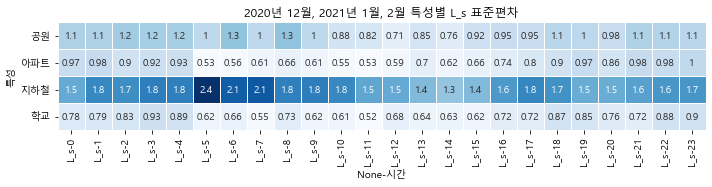

In [80]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [81]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                            \
시간          0          1          2           3           4           5    
특성                                                                         
공원   22.618985  40.351823  62.521114  108.024764  109.327275   62.668511   
아파트  23.640848  33.185604  56.844857   87.233074   92.943068   55.849600   
지하철  19.290189  39.613533  57.814398   87.730989  115.679724  139.856755   
학교   20.664917  33.134152  48.160043   67.678286   73.969906   43.793036   

                                                                             \
시간          6          7         8         9         10        11        12   
특성                                                                            
공원   57.576456  11.089531  6.797486  8.279608  7.539602  4.900700  3.915826   
아파트  22.015636   6.148052  3.699916  5.750564  5.597058  4.844799  3.912004   
지하철  73.511593  20.118566  7.468366  8.842345  9.241213  6.865328  5.419650   
학교   28.540245  12.208760  5.000995  5.323245  5.341719  4.414269  3.504292   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   3.749455  3.175490  3.041517  2.934224  2.901009  2.993780  4.296457   
아파트  3.604595  3.301426  3.252756  3.154370  3.115306  3.275277  4.741058   
지하철  4.752833  4.260351  3.823923  3.745581  3.384803  2.945108  4.031800   
학교   3.131067  2.880720  2.712086  2.631264  2.578318  3.031168  4.444244   

                                              
시간         20        21        22         23  
특성                                            
공원   5.050997  5.679010  9.017104  14.180854  
아파트  5.039388  5.478852  8.858555  15.281802  
지하철  5.013807  5.060930  8.868827  15.245990  
학교   5.187581  5.271152  8.186053  16.071100

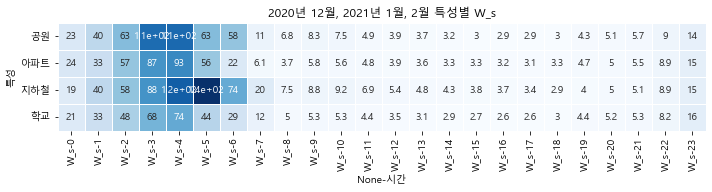

In [82]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 특성별 W_s')
plt.tight_layout()
plt.show()

In [83]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                             \
시간          0          1           2           3           4           5    
특성                                                                          
공원   27.669651  61.857547  128.134781  325.879196  220.851568  162.394047   
아파트  38.548001  46.917149   87.021527  139.279586  156.344893  123.948736   
지하철  18.422857  73.191262   99.032206  129.844004  202.141173  232.312903   
학교   39.333157  71.750867   86.293786  108.857281  137.008620   93.635637   

                                                                      \
시간           6          7          8          9         10        11   
특성                                                                     
공원   132.680876  22.605988  12.494434  12.089609  8.474952  4.544501   
아파트   51.285591   9.889471   5.390614   6.710951  5.174389  4.384965   
지하철  128.001127  26.381155   9.784685   7.853164  6.352433  4.433420   
학교    81.628778  39.163288  11.846130   6.988933  6.114001  4.967403   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   3.470537  3.230381  2.804699  2.649028  2.614328  2.594827  2.819929   
아파트  3.340144  3.075026  2.861695  2.821823  2.776409  2.747311  3.052906   
지하철  3.157718  2.706900  2.393970  2.122973  2.055295  1.950677  1.965999   
학교   3.712429  3.234762  2.950827  2.822095  2.797689  2.841564  3.449006   

                                                         
시간         19        20        21         22         23  
특성                                                       
공원   3.965100  4.902343  5.605177   9.980454  15.770684  
아파트  4.447064  4.757487  5.517981   9.266914  16.141262  
지하철  2.538355  3.458407  3.604616   6.616307  13.972186  
학교   5.968647  7.256104  6.320609  11.336653  34.273413

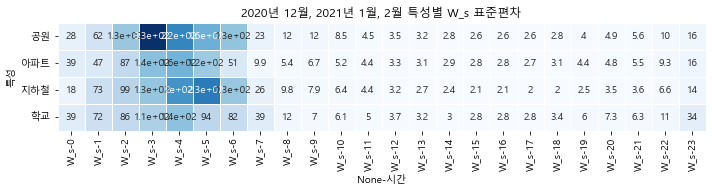

In [84]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 12월, 2021년 1월, 2월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()